In [1]:
# https://projects.propublica.org/nonprofits/organizations/990272261

from collections import OrderedDict
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format, dollar_format

In [2]:
with open('2009.xml', 'r') as f: xml2009 = f.read()
with open('2010.xml', 'r') as f: xml2010 = f.read()
with open('2011.xml', 'r') as f: xml2011 = f.read()    
with open('2012.xml', 'r') as f: xml2012 = f.read()    
with open('2013.xml', 'r') as f: xml2013 = f.read()
with open('2014.xml', 'r') as f: xml2014 = f.read()    
with open('2015.xml', 'r') as f: xml2015 = f.read()
with open('2016.xml', 'r') as f: xml2016 = f.read()
with open('2017.xml', 'r') as f: xml2017 = f.read()
with open('2018.xml', 'r') as f: xml2018 = f.read()
with open('2019.xml', 'r') as f: xml2019 = f.read()    
with open('2020.xml', 'r') as f: xml2020 = f.read()

In [3]:
ns = 'xmlns="http://www.irs.gov/efile"'

return2009 = ET.fromstring(xml2009.replace(ns, ''))
return2010 = ET.fromstring(xml2010.replace(ns, ''))
return2011 = ET.fromstring(xml2011.replace(ns, ''))
return2012 = ET.fromstring(xml2012.replace(ns, ''))
return2013 = ET.fromstring(xml2013.replace(ns, ''))
return2014 = ET.fromstring(xml2014.replace(ns, ''))
return2015 = ET.fromstring(xml2015.replace(ns, ''))
return2016 = ET.fromstring(xml2016.replace(ns, ''))
return2017 = ET.fromstring(xml2017.replace(ns, ''))
return2018 = ET.fromstring(xml2018.replace(ns, ''))
return2019 = ET.fromstring(xml2019.replace(ns, ''))
return2020 = ET.fromstring(xml2020.replace(ns, ''))

returns2009_2012 = [return2009, return2010, return2011, return2012]
returns2013_2020 = [return2013, return2014, return2015, return2016, 
    return2017, return2018, return2019, return2020]

In [4]:
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748' ,'#FF8C00']

In [5]:
def get_text(parent, tag):
    child = parent.find(tag)
    if child is not None:
        text = child.text
    else:
        text = None
    return text

## 0 Total

In [6]:
list0 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =       get_text(head, 'TaxYear')
    dic['1 Revenue'] =  get_text(data, 'TotalRevenueCurrentYear')
    dic['2 Expenses'] = get_text(data, 'TotalExpensesCurrentYear')
    list0.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =       get_text(head, 'TaxYr')
    dic['1 Revenue'] =  get_text(data, 'CYTotalRevenueAmt')
    dic['2 Expenses'] = get_text(data, 'CYTotalExpensesAmt')
    list0.append(dic)

# display(list0)

In [7]:
df0 = pd.DataFrame(list0)
df0 = df0.melt(id_vars='Year', var_name='0 Total', value_name='Dollars')
df0['Dollars'] = df0['Dollars'].astype('int64')
df0 = df0.sort_values(['Year', '0 Total']).reset_index(drop=True)

# display(df0)

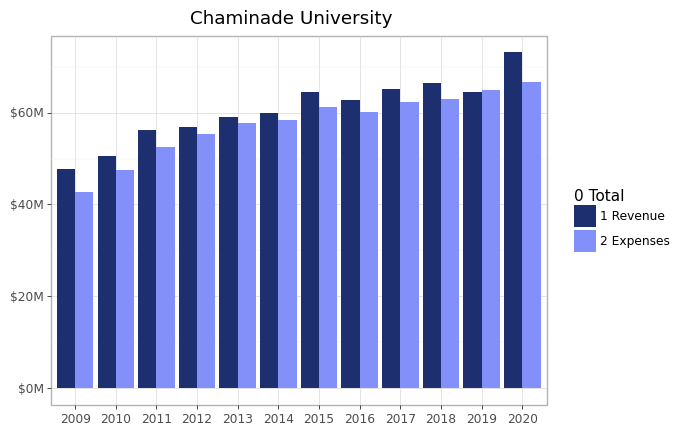

<ggplot: (8779663723162)>

In [8]:
p0 = (p9.ggplot(df0, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='0 Total'), position='dodge')
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p0)

## 1 Revenue

In [9]:
list1 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                       get_text(head, 'TaxYear')
    dic['12 Contributions, grants'] =   get_text(data, 'ContributionsGrantsCurrentYear')
    dic['11 Program service revenue'] = get_text(data, 'ProgramServiceRevenueCY')
    dic['13 Investment income'] =       get_text(data, 'InvestmentIncomeCurrentYear')
    dic['14 Other revenue'] =           get_text(data, 'OtherRevenueCurrentYear')
    list1.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                       get_text(head, 'TaxYr')
    dic['12 Contributions, grants'] =   get_text(data, 'CYContributionsGrantsAmt')
    dic['11 Program service revenue'] = get_text(data, 'CYProgramServiceRevenueAmt')
    dic['13 Investment income'] =       get_text(data, 'CYInvestmentIncomeAmt')
    dic['14 Other revenue'] =           get_text(data, 'CYOtherRevenueAmt')
    list1.append(dic)

# display(list1)

In [10]:
df1 = pd.DataFrame(list1)
df1 = df1.melt(id_vars='Year', var_name='1 Revenue', value_name='Dollars')
df1['Dollars'] = df1['Dollars'].astype('int64')
df1 = df1.sort_values(['Year', '1 Revenue']).reset_index(drop=True)

# display(df1)

In [11]:
# consistency check
A = df0.pivot(index='Year', columns='0 Total', values='Dollars')['1 Revenue']
B = df1.pivot(index='Year', columns='1 Revenue', values='Dollars').sum(axis=1)
display(max(A - B))

0

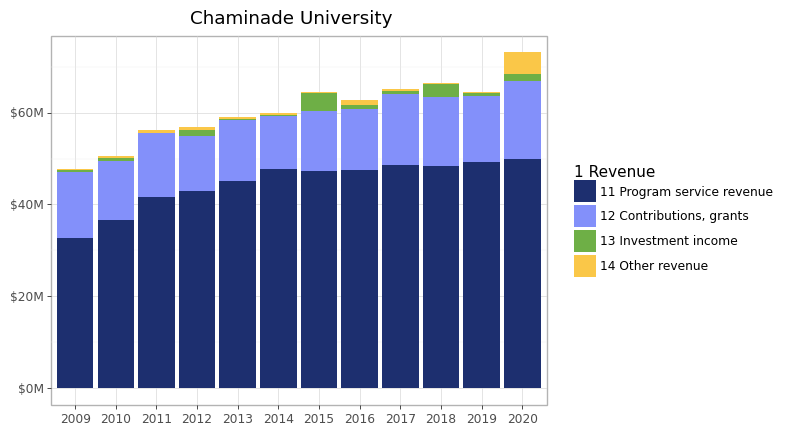

<ggplot: (8779677706105)>

In [12]:
p1 = (p9.ggplot(df1, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='1 Revenue'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p1)

## 2 Expenses

In [13]:
list2 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                get_text(head, 'TaxYear')
    dic['22 Grants'] =           get_text(data, 'GrantsAndSimilarAmntsCY')
    dic['24 Benefits'] =         get_text(data, 'BenefitsPaidToMembersCY')
    dic['21 Salaries'] =         get_text(data, 'SalariesEtcCurrentYear')
    dic['25 Prof Fundraising'] = get_text(data, 'TotalProfFundrsngExpCY')
    dic['23 Other expenses'] =   get_text(data, 'OtherExpensesCurrentYear')
    list2.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                get_text(head, 'TaxYr')
    dic['22 Grants'] =           get_text(data, 'CYGrantsAndSimilarPaidAmt')
    dic['24 Benefits'] =         get_text(data, 'CYBenefitsPaidToMembersAmt')
    dic['21 Salaries'] =         get_text(data, 'CYSalariesCompEmpBnftPaidAmt')
    dic['25 Prof Fundraising'] = get_text(data, 'CYTotalProfFndrsngExpnsAmt')
    dic['23 Other expenses'] =   get_text(data, 'CYOtherExpensesAmt')
    list2.append(dic)

# display(list2)

In [14]:
df2 = pd.DataFrame(list2)
df2 = df2.drop(['24 Benefits', '25 Prof Fundraising'], axis=1)
df2 = df2.melt(id_vars='Year', var_name='2 Expenses', value_name='Dollars')
df2['Dollars'] = df2['Dollars'].astype('int64')
df2 = df2.sort_values(['Year', '2 Expenses']).reset_index(drop=True)

# display(df2)

In [15]:
# consistency check
A = df0.pivot(index='Year', columns='0 Total', values='Dollars')['2 Expenses']
B = df2.pivot(index='Year', columns='2 Expenses', values='Dollars').sum(axis=1)
display(max(A - B))

0

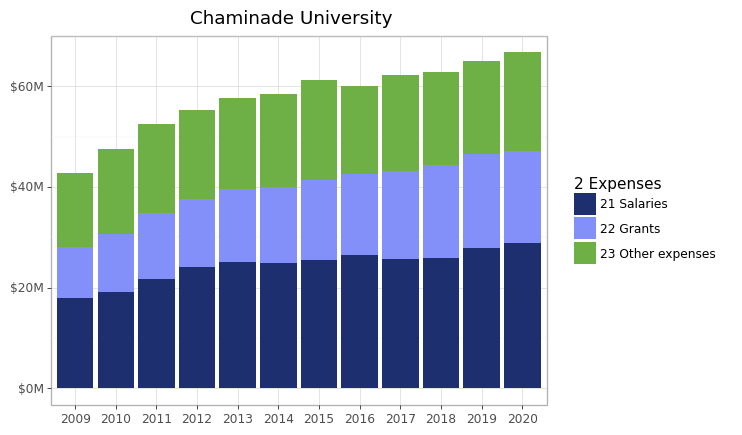

<ggplot: (8779592649530)>

In [16]:
p2 = (p9.ggplot(df2, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='2 Expenses'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p2)

## 11 Program service revenue

In [17]:
list11 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] = get_text(head, 'TaxYear')
    for PSR in data.findall('ProgramServiceRevenue'):
        dic[get_text(PSR, 'Description')] = get_text(PSR, 'TotalRevenueColumn')
    list11.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] = get_text(head, 'TaxYr')
    for PSR in data.findall('ProgramServiceRevenueGrp'):
        dic[get_text(PSR, 'Desc')] = get_text(PSR, 'TotalRevenueColumnAmt')
    list11.append(dic)

# display(list11)

In [18]:
df11 = pd.DataFrame(list11)
df11 = df11.melt(id_vars='Year', var_name='11 Program service revenue', value_name='Dollars')
df11['11 Program service revenue'] = df11['11 Program service revenue'].replace({
     'TUITION AND FEES':  '111 TUITION AND FEES',
     'AUXILIARY REVENUE': '112 AUXILIARY REVENUE'})
df11['Dollars'] = df11['Dollars'].astype('int64')
df111 = df11.sort_values(['Year', '11 Program service revenue']).reset_index(drop=True)

# display(df11)

In [19]:
# consistency check
A = df1.pivot(index='Year',columns='1 Revenue', values='Dollars')['11 Program service revenue']
B = df11.pivot(index='Year', columns='11 Program service revenue', values='Dollars').sum(axis=1)
display(max(A - B))

0

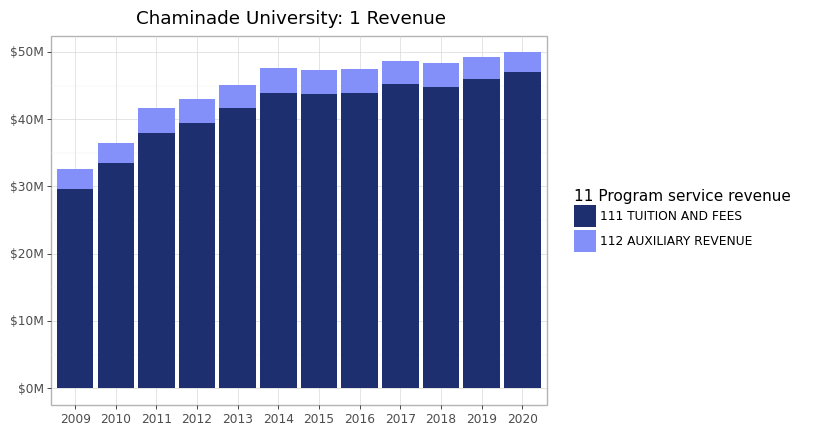

<ggplot: (8779677632109)>

In [20]:
p11 = (p9.ggplot(df11, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='11 Program service revenue'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 1 Revenue')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p11)

## 12 Contributions, grants

In [21]:
list12 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                    get_text(head, 'TaxYear')
    dic['121 Government grants'] =   get_text(data, 'GovernmentGrants')
    dic['123 Fundraising'] =         get_text(data, 'FundraisingEvents')
    dic['122 Other contributions'] = get_text(data, 'AllOtherContributions')
    list12.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                    get_text(head, 'TaxYr')
    dic['121 Government grants'] =   get_text(data, 'GovernmentGrantsAmt')
    dic['123 Fundraising'] =         get_text(data, 'FundraisingAmt')
    dic['122 Other contributions'] = get_text(data, 'AllOtherContributionsAmt')
    list12.append(dic)

# display(list12)

In [22]:
df12 = pd.DataFrame(list12)
df12 = df12.melt(id_vars='Year', var_name='12 Contributions, grants', value_name='Dollars')
df12 = df12.dropna(axis=0)
df12['Dollars'] = df12['Dollars'].astype('int64')
df12 = df12.sort_values(['Year', '12 Contributions, grants']).reset_index(drop=True)

# display(df12)

In [23]:
# consistency check
A = df1.pivot(index='Year',columns='1 Revenue', values='Dollars')['12 Contributions, grants']
B = df12.pivot(index='Year',columns='12 Contributions, grants', values='Dollars').sum(axis=1)
display(max(A - B))

0.0

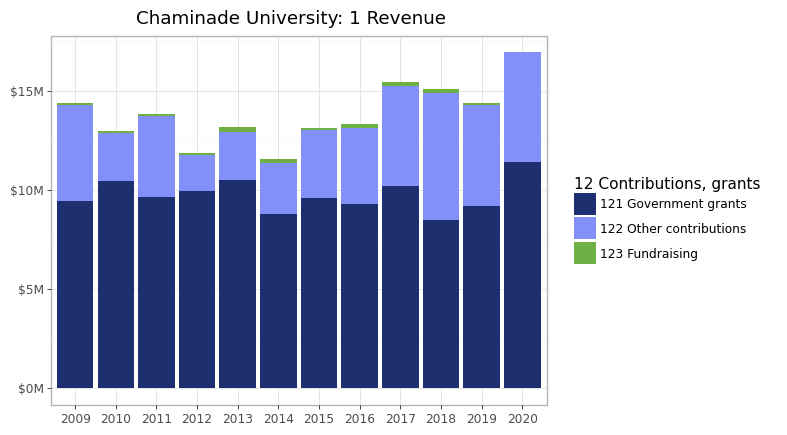

<ggplot: (8779643671661)>

In [24]:
p12 = (p9.ggplot(df12, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='12 Contributions, grants'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 1 Revenue')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p12)

## 13 Investment income

In [25]:
list13 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                    get_text(head, 'TaxYear')
    dic['131 Dividends, interest'] = get_text(data, 'InvestmentIncome/TotalRevenueColumn')
    dic['132 Net sale of assets'] =  get_text(data, 'NetGainOrLossInvestments/TotalRevenueColumn')
    list13.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                    get_text(head, 'TaxYr')
    dic['131 Dividends, interest'] = get_text(data, 'InvestmentIncomeGrp/TotalRevenueColumnAmt')
    dic['132 Net sale of assets'] =  get_text(data, 'NetGainOrLossInvestmentsGrp/TotalRevenueColumnAmt')
    list13.append(dic)

# display(list13)

In [26]:
df13 = pd.DataFrame(list13)
df13 = df13.melt(id_vars='Year', var_name='13 Investment income', value_name='Dollars')
df13['Dollars'] = df13['Dollars'].astype('int64')
df13 = df13.sort_values(['Year', '13 Investment income']).reset_index(drop=True)

# display(df13)

In [27]:
# consistency check
A = df1.pivot(index='Year', columns='1 Revenue', values='Dollars')['13 Investment income']
B = df13.pivot(index='Year', columns='13 Investment income', values='Dollars').sum(axis=1)
display(max(A - B))

0

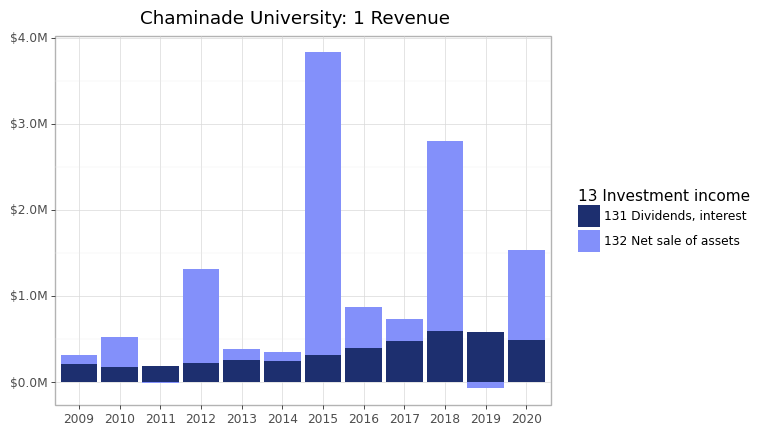

<ggplot: (8779592643581)>

In [28]:
p13 = (p9.ggplot(df13, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='13 Investment income'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.1f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 1 Revenue')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p13)

## 14 Other revenue

In [29]:
list14 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                    get_text(head, 'TaxYear')
    dic['143 Rents'] =               get_text(data, 'NetRentalIncomeOrLoss/TotalRevenueColumn')
    dic['144 Fundraising events'] =  get_text(data, 'NetIncomeFromFundraisingEvents/TotalRevenueColumn')
    dic['142 Sale of inventory'] =   get_text(data, 'NetIncomeOrLoss/TotalRevenueColumn')
    dic['141 Miscellaneous'] =       get_text(data, 'TotalOtherRevenue')
    list14.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                    get_text(head, 'TaxYr')
    dic['143 Rents'] =               get_text(data, 'NetRentalIncomeOrLossGrp/TotalRevenueColumnAmt')
    dic['144 Fundraising events'] =  get_text(data, 'NetIncmFromFundraisingEvtGrp/TotalRevenueColumnAmt')
    dic['142 Sale of inventory'] =   get_text(data, 'NetIncomeOrLossGrp/TotalRevenueColumnAmt')
    dic['141 Miscellaneous'] =       get_text(data, 'OtherRevenueTotalAmt')
    list14.append(dic)

# display(list14)

In [30]:
df14 = pd.DataFrame(list14)
df14 = df14.melt(id_vars='Year', var_name='14 Other revenue', value_name='Dollars')
df14 = df14.dropna(axis=0)
df14['Dollars'] = df14['Dollars'].astype('int64')
df14 = df14.sort_values(['Year', '14 Other revenue']).reset_index(drop=True)

# display(df14)

In [31]:
# consistency check
A = df1.pivot(index='Year', columns='1 Revenue', values='Dollars')['14 Other revenue']
B = df14.pivot(index='Year', columns='14 Other revenue', values='Dollars').sum(axis=1)
display(max(A - B))

0.0

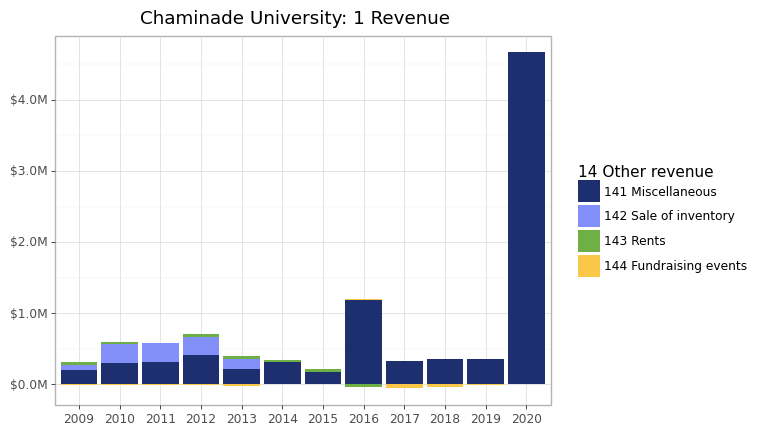

<ggplot: (8779664347260)>

In [32]:
p14 = (p9.ggplot(df14, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='14 Other revenue'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.1f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 1 Revenue')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p14)

## 141 Miscellaneous

In [33]:
list141 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] = get_text(head, 'TaxYear')
    for other in data.findall('OtherRevenueMisc'):
        dic[get_text(other, 'Description')] = get_text(other, 'TotalRevenueColumn')
    dic['All other'] = None
    list141.append(dic)
    
for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] = get_text(head, 'TaxYr')
    for other in data.findall('OtherRevenueMiscGrp'):
        dic[get_text(other, 'Desc')] = get_text(other, 'TotalRevenueColumnAmt')
    dic['All other'] =  get_text(data, 'MiscellaneousRevenueGrp/TotalRevenueColumnAmt')
    list141.append(dic)

# display(list141)

In [34]:
df141 = pd.DataFrame(list141)
df141 = df141.melt(id_vars='Year', var_name='141 Miscellaneous', value_name='Dollars')
df141['141 Miscellaneous'] = df141['141 Miscellaneous'].replace({
    'OTHER INCOME':                      '1411 OTHER INCOME',
    'BOOKSTORE INCOME':                  '1412 BOOKSTORE INCOME',
    'PAYCHECK PROTECTION PROGRAM (PPP)': '1413 PAYCHECK PROTECTION',
    'All other':                         '1414 All other'})
df141 = df141.dropna(axis=0)
df141['Dollars'] = df141['Dollars'].astype('int64')
df141 = df141.sort_values(['Year', '141 Miscellaneous']).reset_index(drop=True)

# display(df141) 

In [35]:
# consistency check
A = df14.pivot(index='Year', columns='14 Other revenue', values='Dollars')['141 Miscellaneous']
B = df141.pivot(index='Year', columns='141 Miscellaneous', values='Dollars').sum(axis=1)
display(max(A - B))

0.0

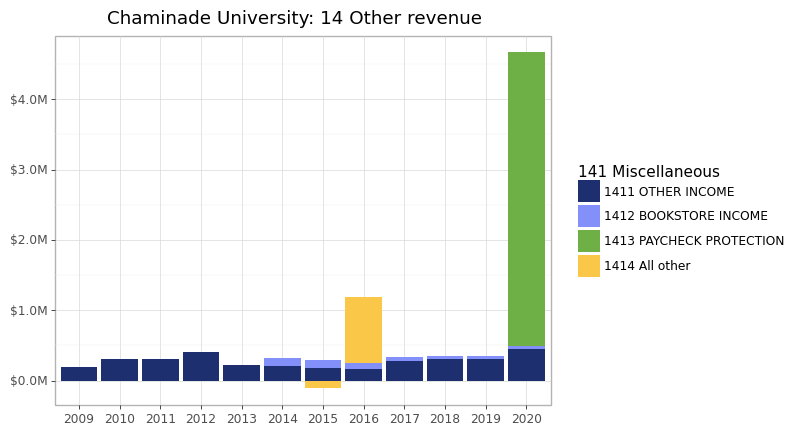

<ggplot: (8779677893063)>

In [36]:
p141 = (p9.ggplot(df141, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='141 Miscellaneous'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.1f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 14 Other revenue')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p141)

## 21 Salaries

In [37]:
list21 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                              get_text(head, 'TaxYear')
    dic['212 Officers, key employees, etc.'] = get_text(data, 'CompCurrentOfficersDirectors/Total')
    dic['211 Other salaries and wages'] =      get_text(data, 'OtherSalariesAndWages/Total')
    dic['213 Pension plan'] =                  get_text(data, 'PensionPlanContributions/Total')
    dic['214 Other employee benefits'] =       get_text(data, 'OtherEmployeeBenefits/Total')
    dic['215 Payroll taxes'] =                 get_text(data, 'PayrollTaxes/Total')
    list21.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                              get_text(head, 'TaxYr')
    dic['212 Officers, key employees, etc.'] = get_text(data, 'CompCurrentOfcrDirectorsGrp/TotalAmt')
    dic['211 Other salaries and wages'] =      get_text(data, 'OtherSalariesAndWagesGrp/TotalAmt')
    dic['213 Pension plan'] =                  get_text(data, 'PensionPlanContributionsGrp/TotalAmt')
    dic['214 Other employee benefits'] =       get_text(data, 'OtherEmployeeBenefitsGrp/TotalAmt')
    dic['215 Payroll taxes'] =                 get_text(data, 'PayrollTaxesGrp/TotalAmt')
    list21.append(dic)

# display(list21)

In [38]:
df21 = pd.DataFrame(list21)
df21 = df21.melt(id_vars='Year', var_name='21 Salaries', value_name='Dollars')
df21 = df21.dropna(axis=0)
df21['Dollars'] = df21['Dollars'].astype('int64')
df21 = df21.sort_values(['Year', '21 Salaries']).reset_index(drop=True)

# display(df21)

In [39]:
# consistency check
A = df2.pivot(index='Year', columns='2 Expenses', values='Dollars')['21 Salaries']
B = df21.pivot(index='Year', columns='21 Salaries', values='Dollars').sum(axis=1)
display(max(A - B))

0

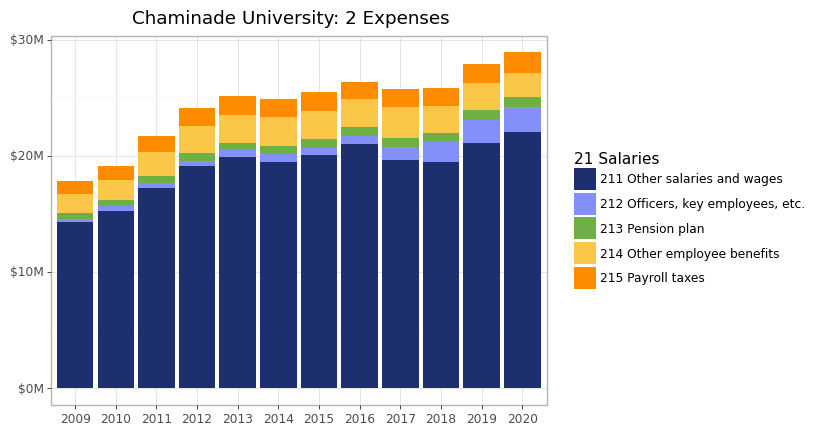

<ggplot: (8779626500006)>

In [40]:
p21 = (p9.ggplot(df21, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='21 Salaries'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 2 Expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p21)

## 22 Grants

In [41]:
list22 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =       get_text(head, 'TaxYear')
    dic['221 Grants'] = get_text(data, 'GrantsToDomesticIndividuals/Total')
    list22.append(dic)

for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =       get_text(head, 'TaxYr')
    dic['221 Grants'] = get_text(data, 'GrantsToDomesticIndividualsGrp/TotalAmt')
    list22.append(dic)

# display(list21)

In [42]:
df22 = pd.DataFrame(list22)
df22 = df22.melt(id_vars='Year', var_name='22 Grants', value_name='Dollars')
df22 = df22.dropna(axis=0)
df22['Dollars'] = df22['Dollars'].astype('int64')
df22 = df22.sort_values(['Year', '22 Grants']).reset_index(drop=True)

# display(df22)

In [43]:
# consistency check
A = df2.pivot(index='Year', columns='2 Expenses', values='Dollars')['22 Grants']
B = df22.pivot(index='Year', columns='22 Grants', values='Dollars').sum(axis=1)
display(max(A - B))

0

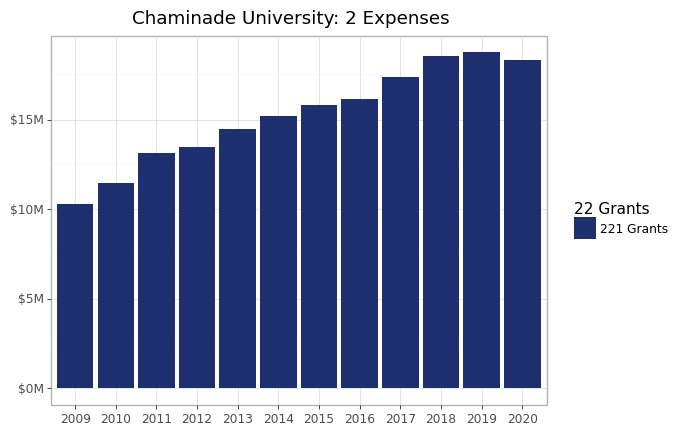

<ggplot: (8779626494645)>

In [44]:
p22 = (p9.ggplot(df22, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='22 Grants'),
        position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.0f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 2 Expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p22)

## 23 Other expenses

In [157]:
list23 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                 get_text(head, 'TaxYear')
    dic['2353 Management fees'] = get_text(data, 'FeesForServicesManagement/Total')
    dic['2351 Legal fees'] =      get_text(data, 'FeesForServicesLegal/Total')
    dic['2352 Accounting fees'] = get_text(data, 'FeesForServicesAccounting/Total')
    dic['2332 Advertising'] =     get_text(data, 'Advertising/Total')
    dic['2333 Office'] =          get_text(data, 'OfficeExpenses/Total')
    dic['2331 Technology'] =      get_text(data, 'InformationTechnology/Total')
    dic['2312 Occupancy'] =       get_text(data, 'Occupancy/Total')
    dic['2341 Travel'] =          get_text(data, 'Travel/Total')
    dic['2342 Conferences'] =     get_text(data, 'ConferencesMeetings/Total')
    dic['2323 Interest'] =        get_text(data, 'Interest/Total')
    dic['2322 Depreciation'] =    get_text(data, 'DepreciationDepletion/Total')
    dic['2321 Insurance'] =       get_text(data, 'Insurance/Total')
    for other in data.findall('OtherExpenses'):
        dic[get_text(other, 'Description')] = get_text(other, 'Total')
    dic['All other'] = get_text(data, 'AllOtherExpenses/Total')
    list23.append(dic)
    
for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    dic = OrderedDict()
    dic['Year'] =                 get_text(head, 'TaxYr')
    dic['2353 Management fees'] = get_text(data, 'FeesForServicesManagementGrp/TotalAmt')
    dic['2351 Legal fees'] =      get_text(data, 'FeesForServicesLegalGrp/TotalAmt')
    dic['2352 Accounting fees'] = get_text(data, 'FeesForServicesAccountingGrp/TotalAmt')
    dic['2332 Advertising'] =     get_text(data, 'AdvertisingGrp/TotalAmt')
    dic['2333 Office'] =          get_text(data, 'OfficeExpensesGrp/TotalAmt')
    dic['2331 Technology'] =      get_text(data, 'InformationTechnologyGrp/TotalAmt')
    dic['2312 Occupancy'] =       get_text(data, 'OccupancyGrp/TotalAmt')
    dic['2341 Travel'] =          get_text(data, 'TravelGrp/TotalAmt')
    dic['2342 Conferences'] =     get_text(data, 'ConferencesMeetingsGrp/TotalAmt')
    dic['2323 Interest'] =        get_text(data, 'InterestGrp/TotalAmt')
    dic['2322 Depreciation'] =    get_text(data, 'DepreciationDepletionGrp/TotalAmt')
    dic['2321 Insurance'] =       get_text(data, 'InsuranceGrp/TotalAmt')
    for other in data.findall('OtherExpensesGrp'):
        dic[get_text(other, 'Desc')] = get_text(other, 'TotalAmt')
    dic['All other'] = get_text(data, 'AllOtherExpensesGrp/TotalAmt')
    list23.append(dic)

# display(list23)

In [171]:
df23 = pd.DataFrame(list23)
df23 = df23.melt(id_vars='Year', var_name='23 Other expenses', value_name='Dollars')
df23 = df23.dropna(axis=0)
df23['23 Other expenses'] = df23['23 Other expenses'].replace({
    'ACADEMIC SUPPORT':        '2361 ACADEMIC SUPPORT',
    'BAD DEBT':                '2324 BAD DEBT',
    'DUES & SUBSCRIPTIONS':    '2362 DUES & SUBSCRIPTIONS',
    'FOOD, ROOM & BOARD':      '2311 FOOD, ROOM & BOARD',
    'MAINTENANCE':             '2313 MAINTENANCE',
    'PROFESSIONAL DEVELOPMEN': '2343 PROFESSIONAL DEVELOPMEN',
    'All other':               '2371 All other'})
df23['Dollars'] = df23['Dollars'].astype('int64')
df23 = df23.sort_values(['Year', '23 Other expenses']).reset_index(drop=True)

# display(df23)

In [159]:
# consistency check
A = df2.pivot(index='Year', columns='2 Expenses', values='Dollars')['23 Other expenses']
B = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').sum(axis=1)
display(max(A - B))

0.0

In [160]:
df231 = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').reset_index()
df231 = df231[[
    'Year',
    '2311 FOOD, ROOM & BOARD',
    '2312 Occupancy',
    '2313 MAINTENANCE']]
df231 = df231.melt(id_vars='Year', var_name='231 Occupancy, etc.', value_name='Dollars')
df231 = df231.dropna(axis=0)

# display(df231)

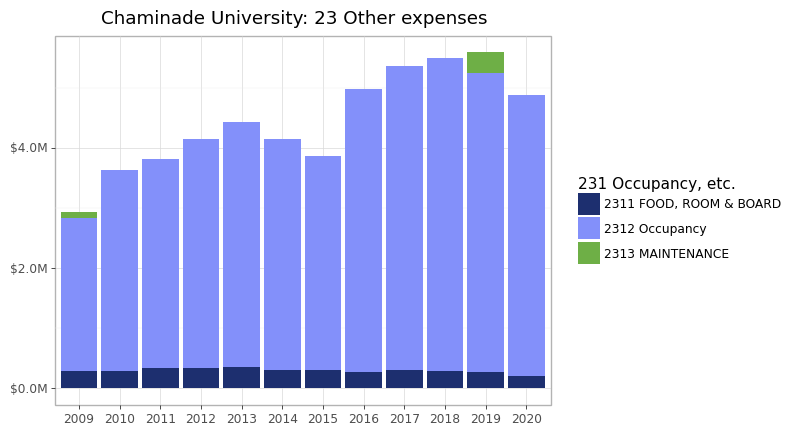

<ggplot: (8779678837730)>

In [161]:
p231 = (p9.ggplot(df231, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='231 Occupancy, etc.'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.1f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 23 Other expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p231)

In [162]:
df232 = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').reset_index()
df232 = df232[[
    'Year',
    '2323 Interest',
    '2322 Depreciation',
    '2321 Insurance',
    '2324 BAD DEBT']]
df232 = df232.melt(id_vars='Year', var_name='232 Depreciation, etc.', value_name='Dollars')
df232 = df232.dropna(axis=0)

# display(df232)

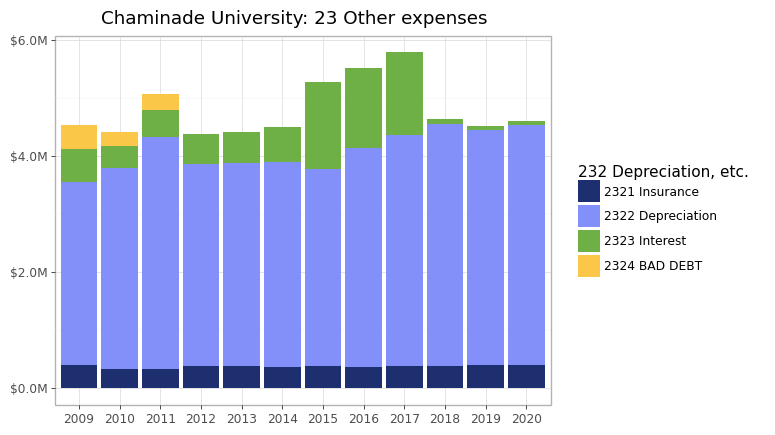

<ggplot: (8779678533244)>

In [163]:
p232 = (p9.ggplot(df232, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='232 Depreciation, etc.'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.1f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 23 Other expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p232)

In [164]:
df233 = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').reset_index()
df233 = df233[[
    'Year',
    '2332 Advertising',
    '2333 Office',
    '2331 Technology']]
df233 = df233.melt(id_vars='Year', var_name='233 Office, etc.', value_name='Dollars')
df233 = df233.dropna(axis=0)

# display(df233)

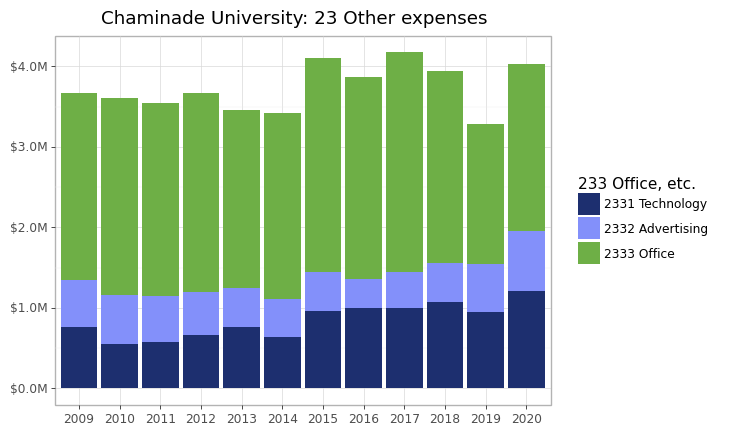

<ggplot: (8779678485745)>

In [165]:
p233 = (p9.ggplot(df233, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='233 Office, etc.'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e6:.1f}M' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 23 Other expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p233)

In [166]:
df234 = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').reset_index()
df234 = df234[[
    'Year',
    '2341 Travel',
    '2342 Conferences',
    '2343 PROFESSIONAL DEVELOPMEN']]
df234 = df234.melt(id_vars='Year', var_name='234 Travel, etc.', value_name='Dollars')
df234 = df234.dropna(axis=0)

# display(df234)

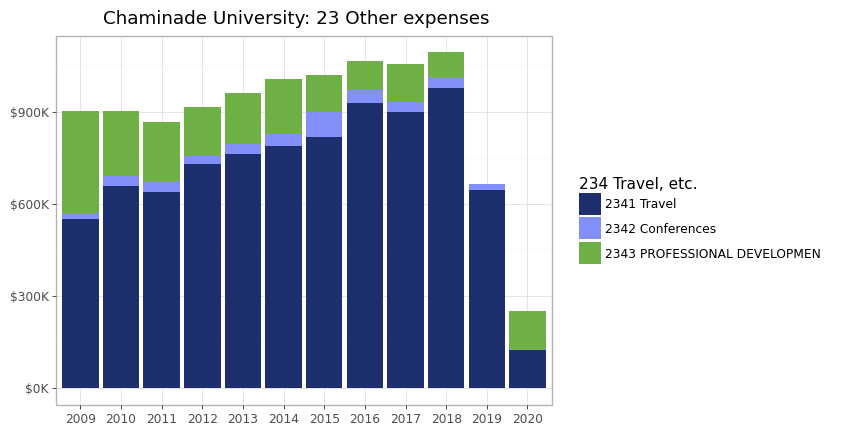

<ggplot: (8779678136308)>

In [167]:
p234 = (p9.ggplot(df234, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='234 Travel, etc.'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e3:.0f}K' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 23 Other expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p234)

In [169]:
df235 = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').reset_index()
df235 = df235[[
    'Year',
    '2353 Management fees',
    '2351 Legal fees',
    '2352 Accounting fees']]
df235 = df235.melt(id_vars='Year', var_name='235 Accounting, etc.', value_name='Dollars')
df235 = df235.dropna(axis=0)

# display(df235)

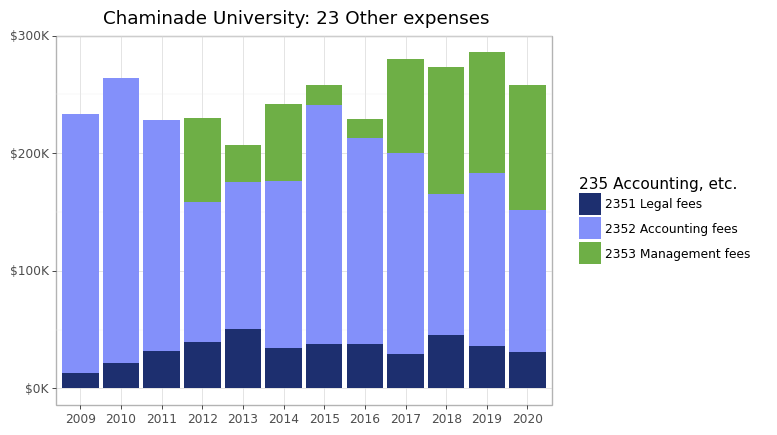

<ggplot: (8779678136266)>

In [170]:
p235 = (p9.ggplot(df235, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='235 Accounting, etc.'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e3:.0f}K' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 23 Other expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p235)

In [173]:
df236 = df23.pivot(index='Year', columns='23 Other expenses', values='Dollars').reset_index()
df236 = df236[[
    'Year',
    '2361 ACADEMIC SUPPORT',
    '2362 DUES & SUBSCRIPTIONS']]
df236 = df236.melt(id_vars='Year', var_name='236 Academic, etc.', value_name='Dollars')
df236 = df236.dropna(axis=0)

# display(df236)

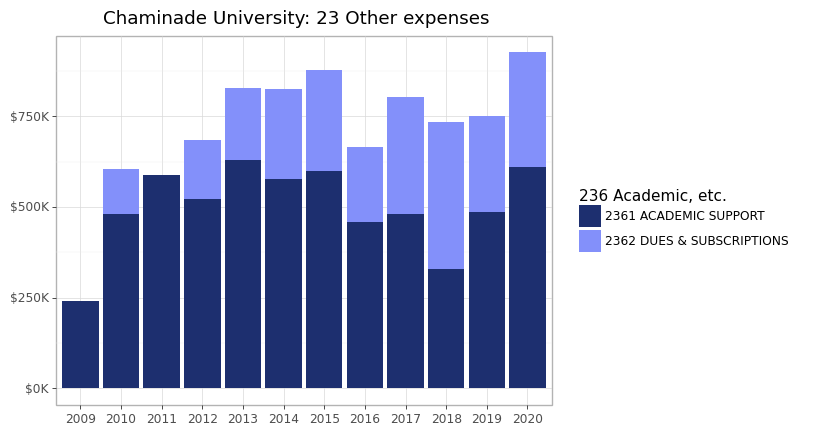

<ggplot: (8779626252978)>

In [175]:
p236 = (p9.ggplot(df236, p9.aes(x='Year', y='Dollars'))
    + p9.geom_col(p9.aes(fill='236 Academic, etc.'), position=p9.position_stack(reverse=True)) 
    + p9.scale_y_continuous(labels=lambda xs: [f'${x/1e3:.0f}K' for x in xs])
    + p9.xlab('') + p9.ylab('') + p9.ggtitle('Chaminade University: 23 Other expenses')
    + p9.scale_fill_manual(values=colors) + p9.theme_light())

display(p236)